In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

from utils import NEW_STRUCT_PEOPLE, NEW_MULTIMODAL_TIMESERIES


In [2]:
filtered_people = sorted(list(set(NEW_MULTIMODAL_TIMESERIES)
                              .intersection(set(NEW_STRUCT_PEOPLE))))

def get_struct_path(person):
    return f'../hcp_multimodal_parcellation/HCP_tracks_matrices_BN_withcerebellum/{person}/{person}_{person}_BN_Atlas_246_1mm_geom_withcerebellum_RS.txt'


def get_timeseries_path(person, session_day):
    return f'../hcp_multimodal_parcellation/concatenated_timeseries/{person}_{session_day}.npy'

## Plotting the mean/std of each ROI for 5 people

#############################################################################################################################################
#############################################################################################################################################
100307


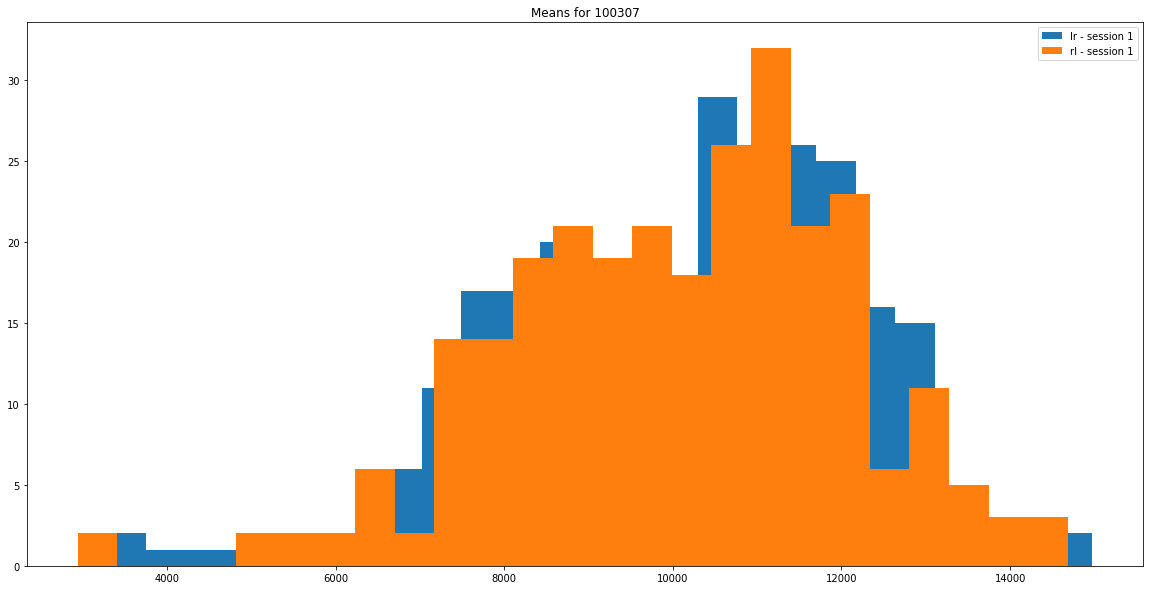

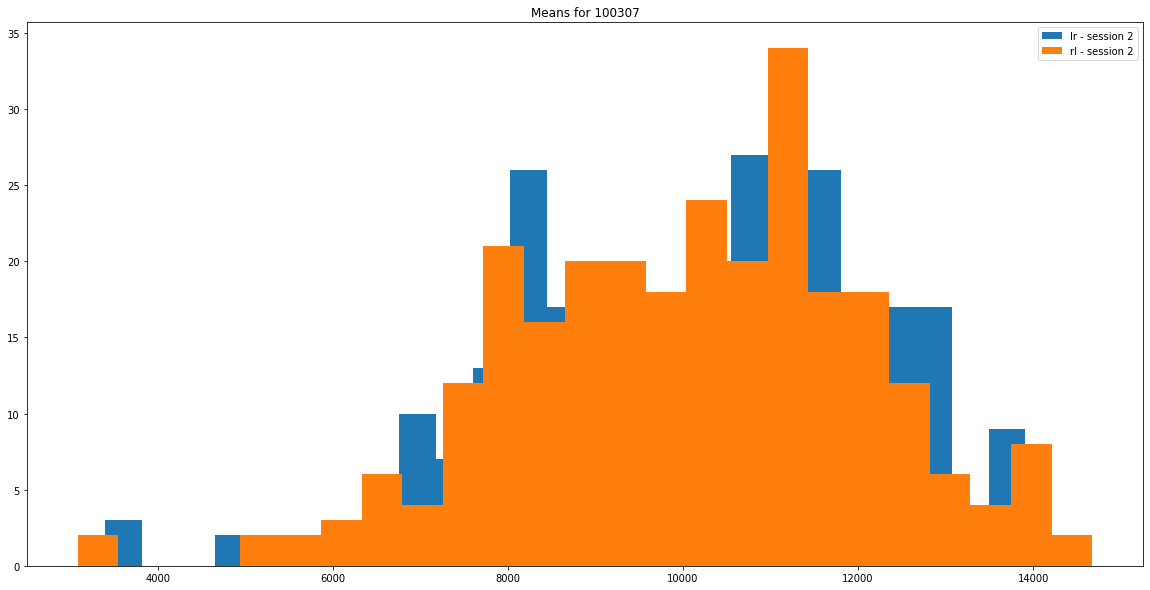

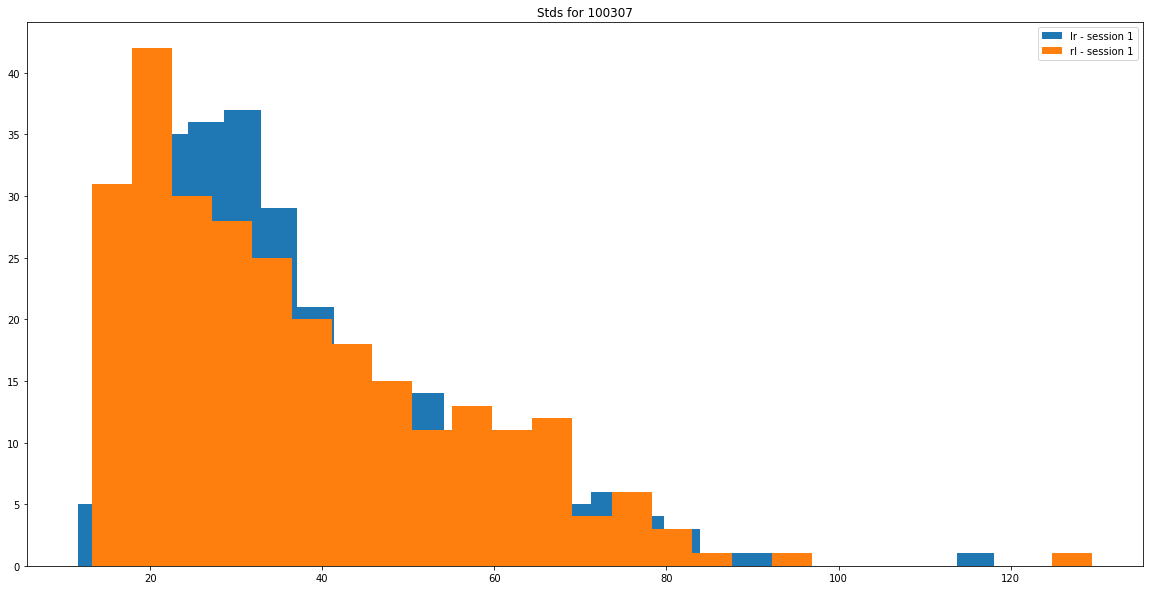

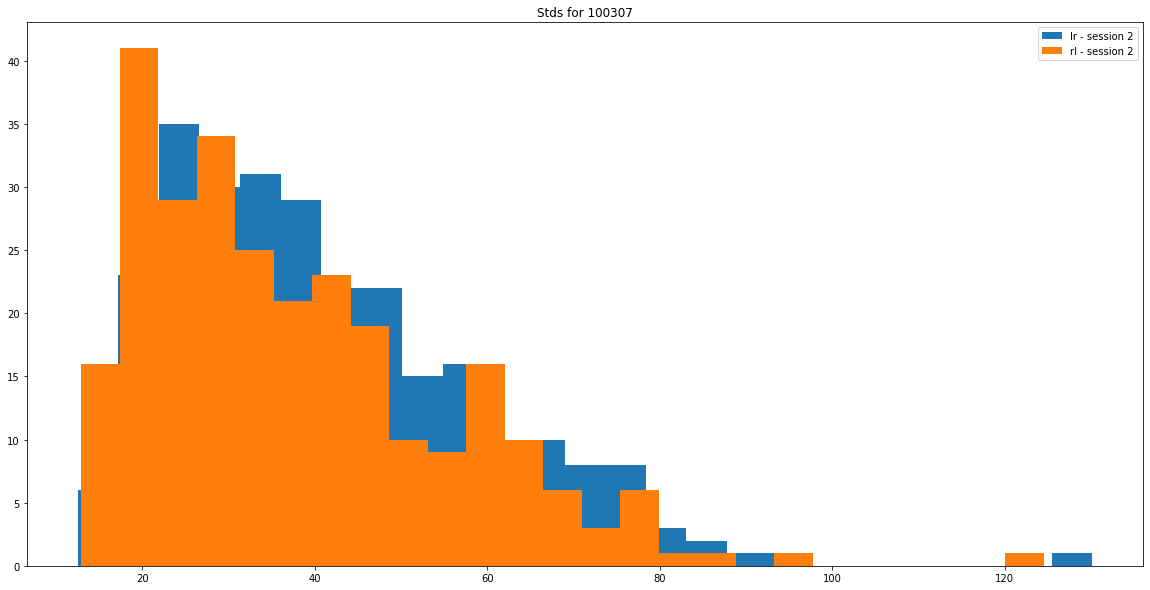

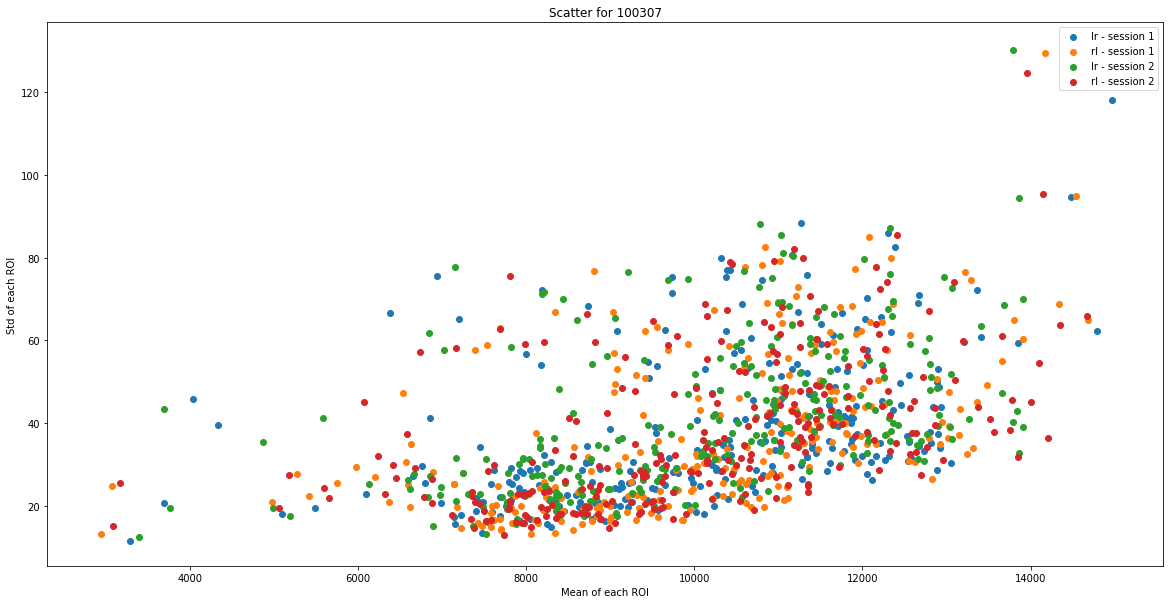

Position of maximum std: 264 264 264 264 
#############################################################################################################################################
#############################################################################################################################################
177140


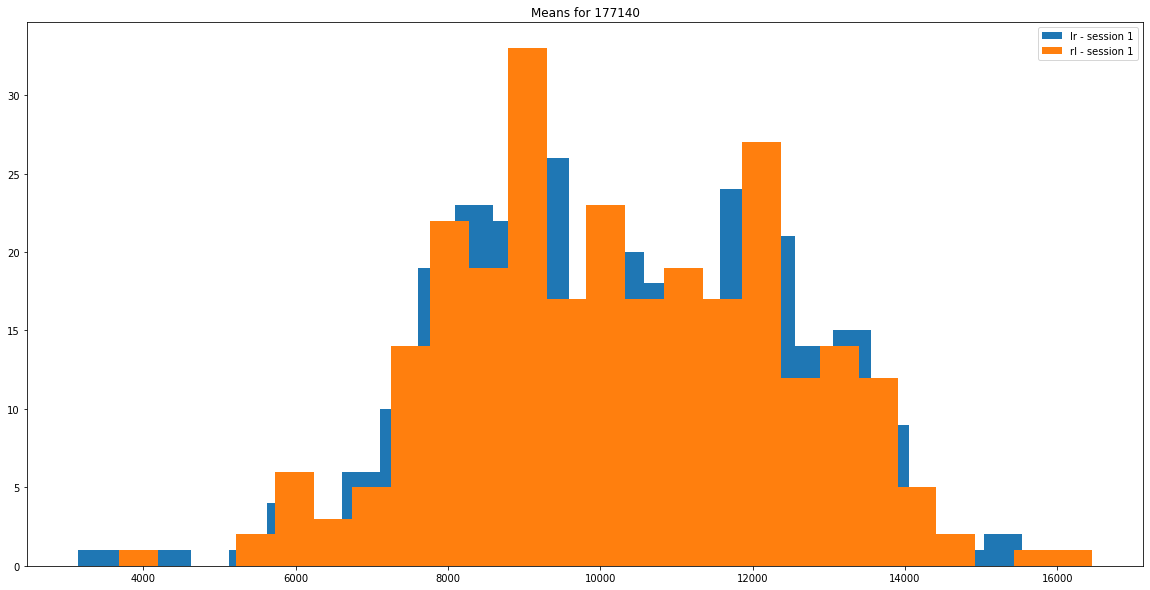

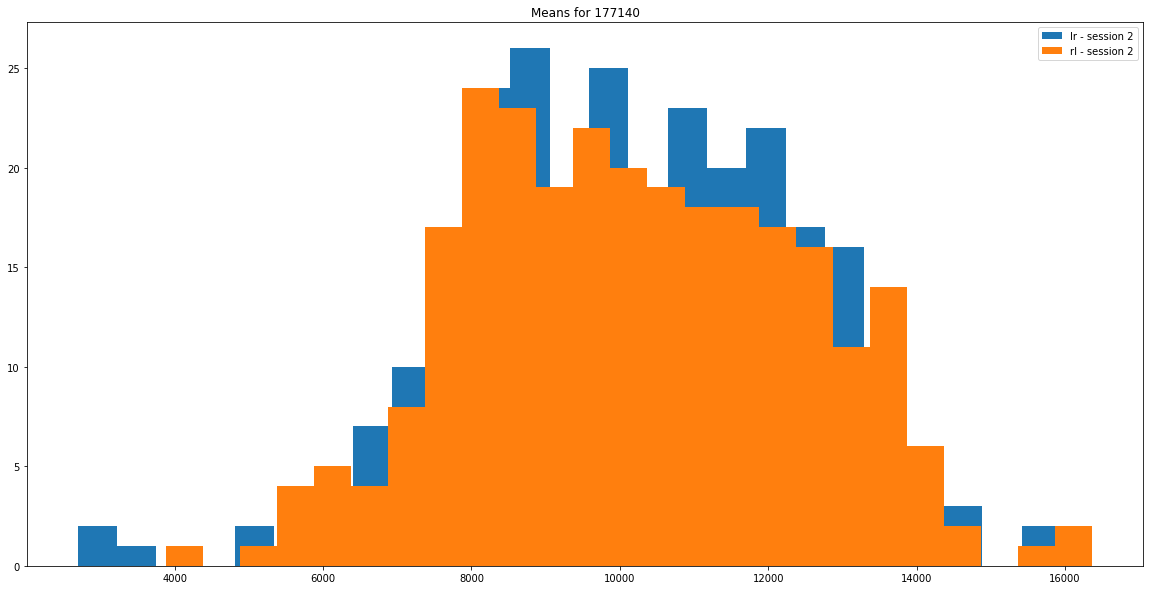

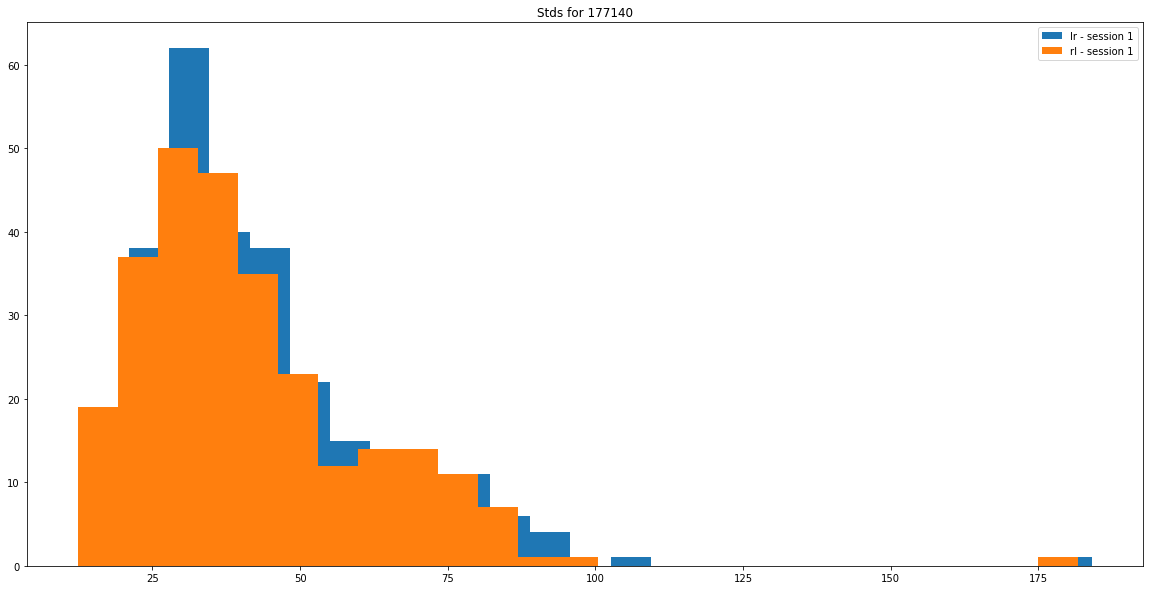

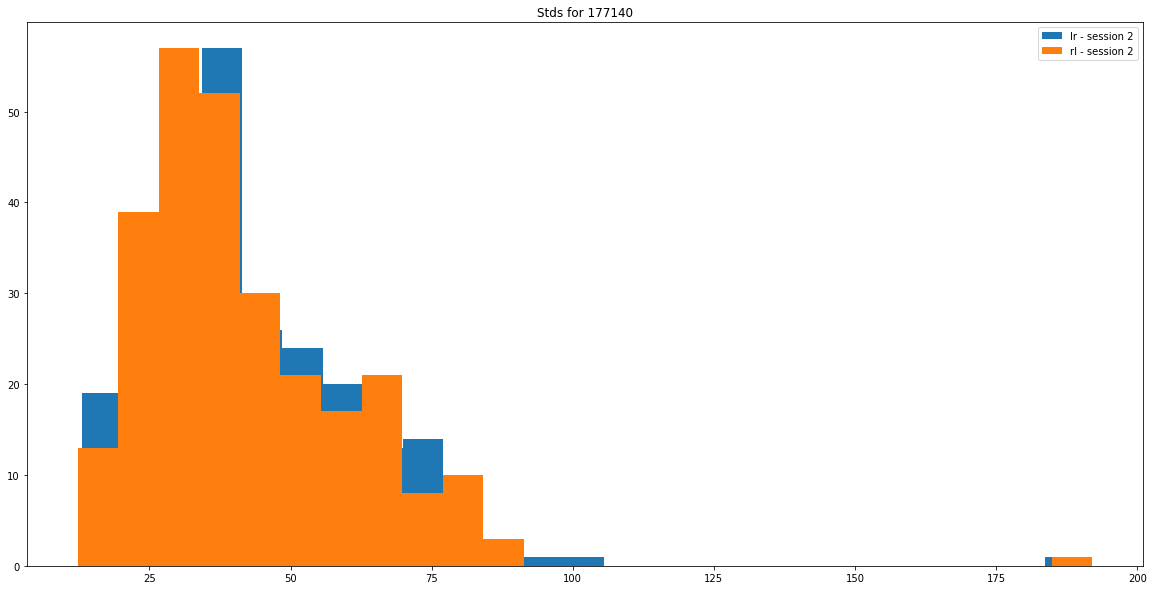

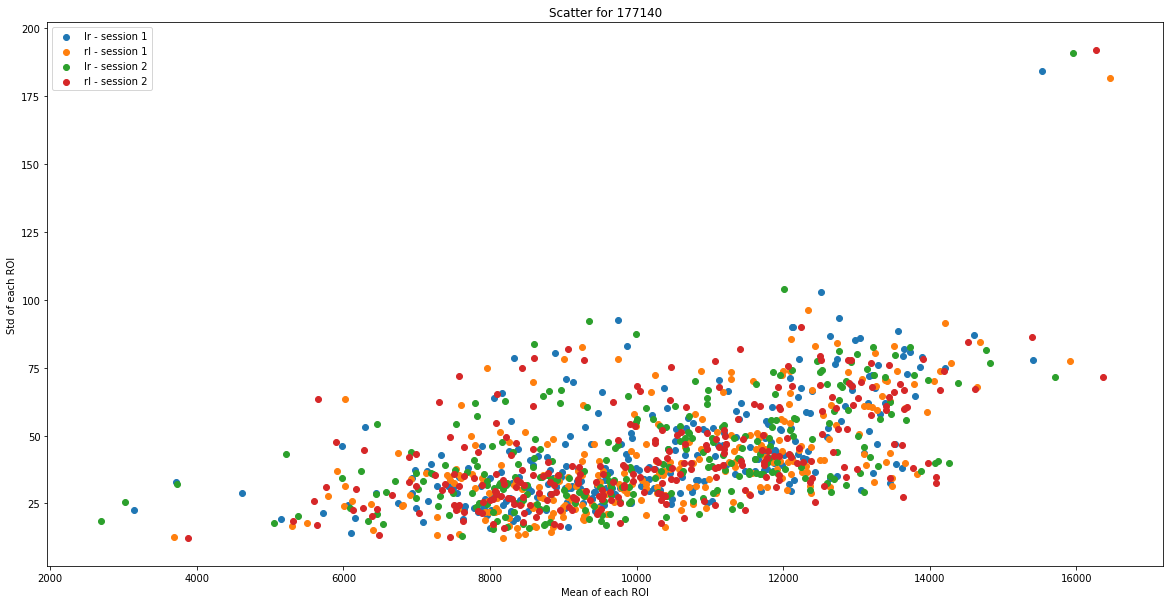

Position of maximum std: 264 264 264 264 
#############################################################################################################################################
#############################################################################################################################################
257542


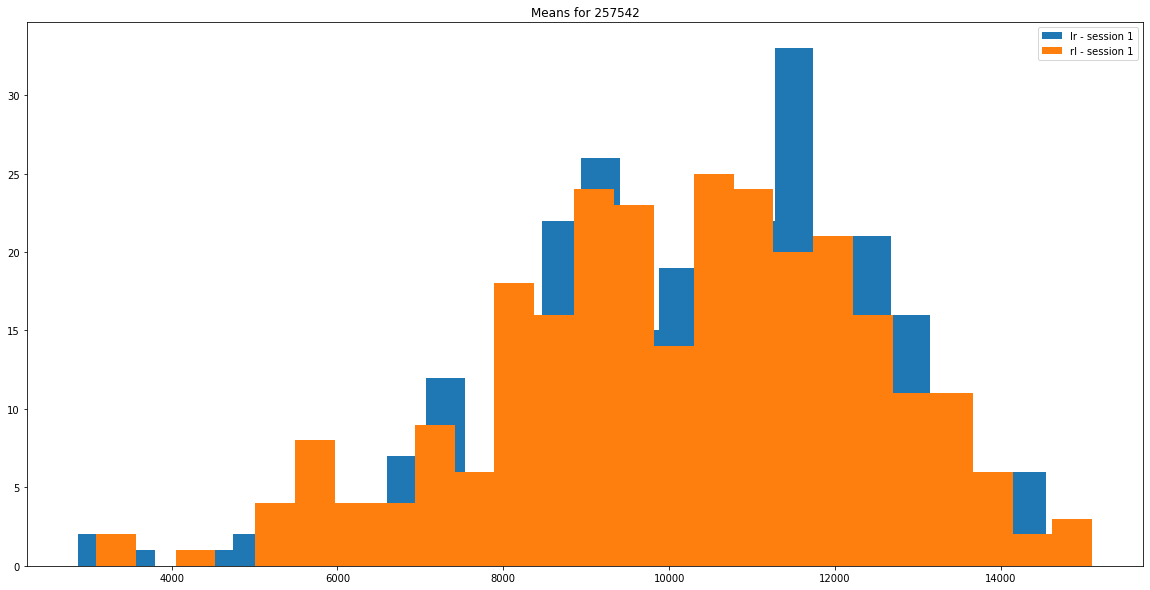

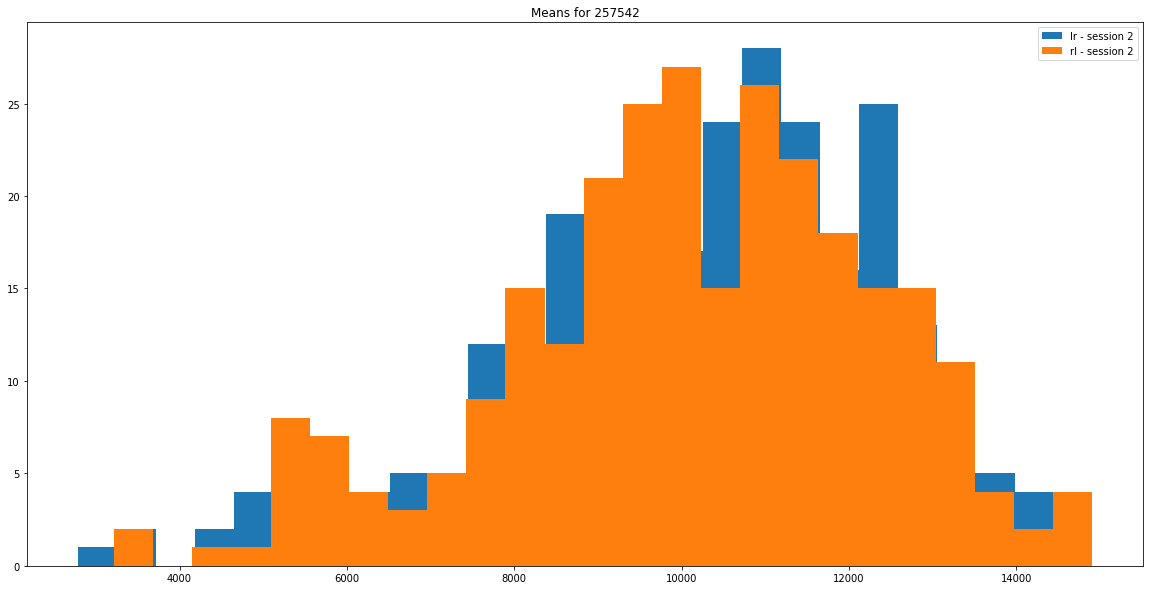

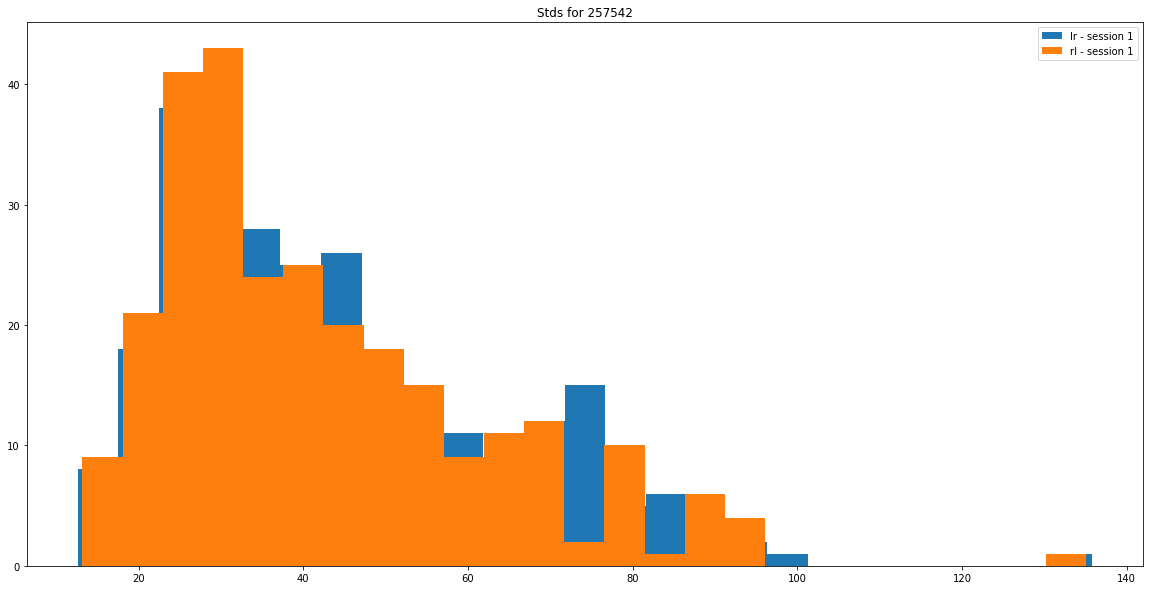

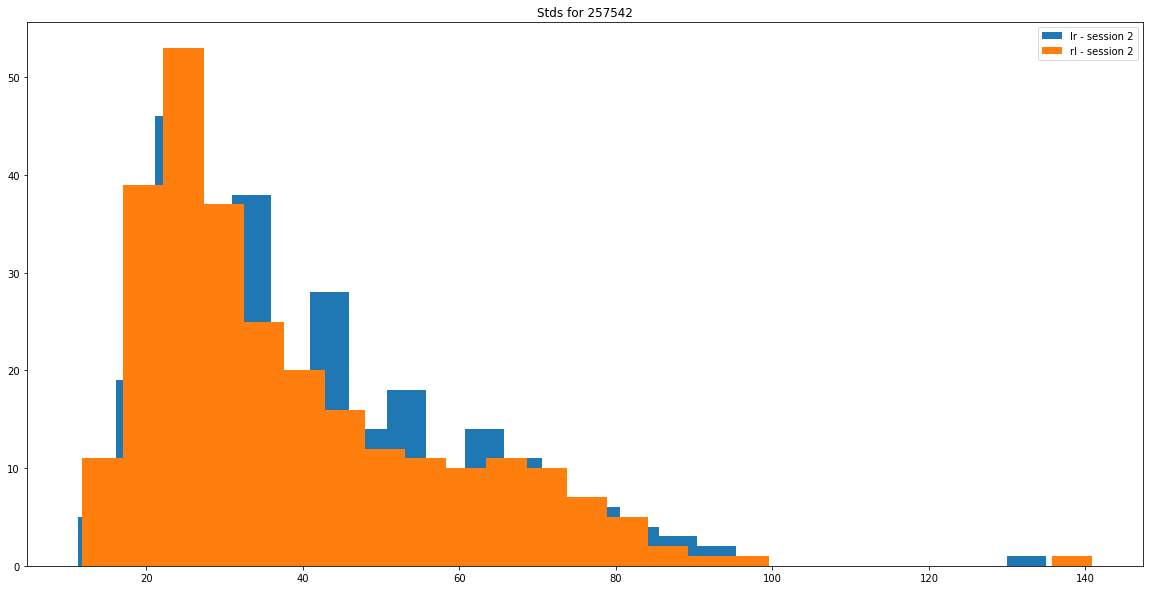

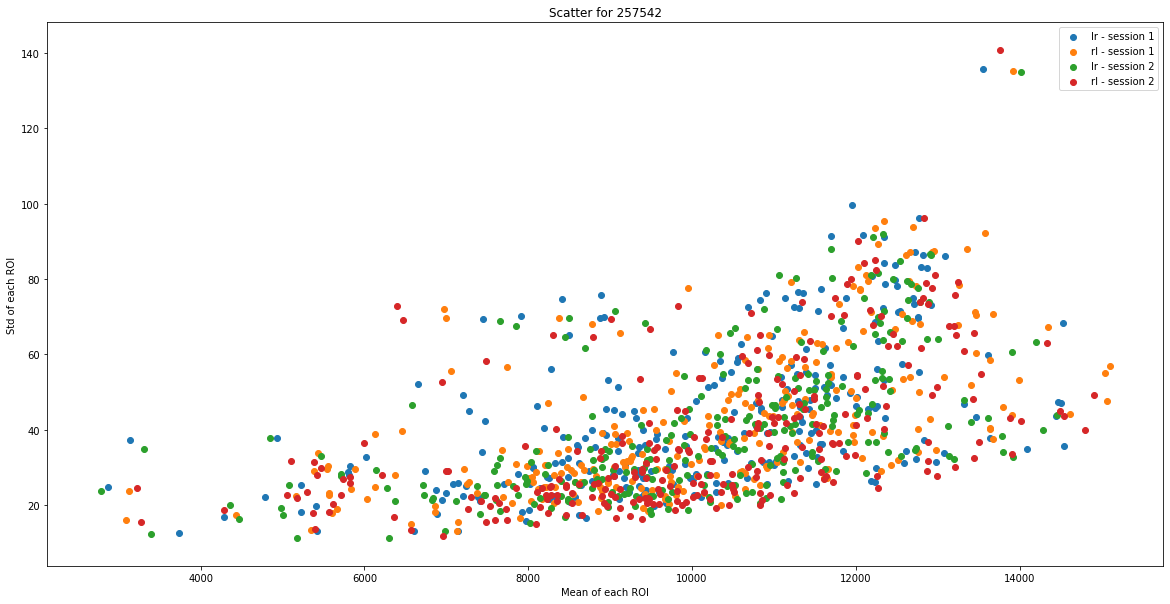

Position of maximum std: 264 264 264 264 
#############################################################################################################################################
#############################################################################################################################################
594156


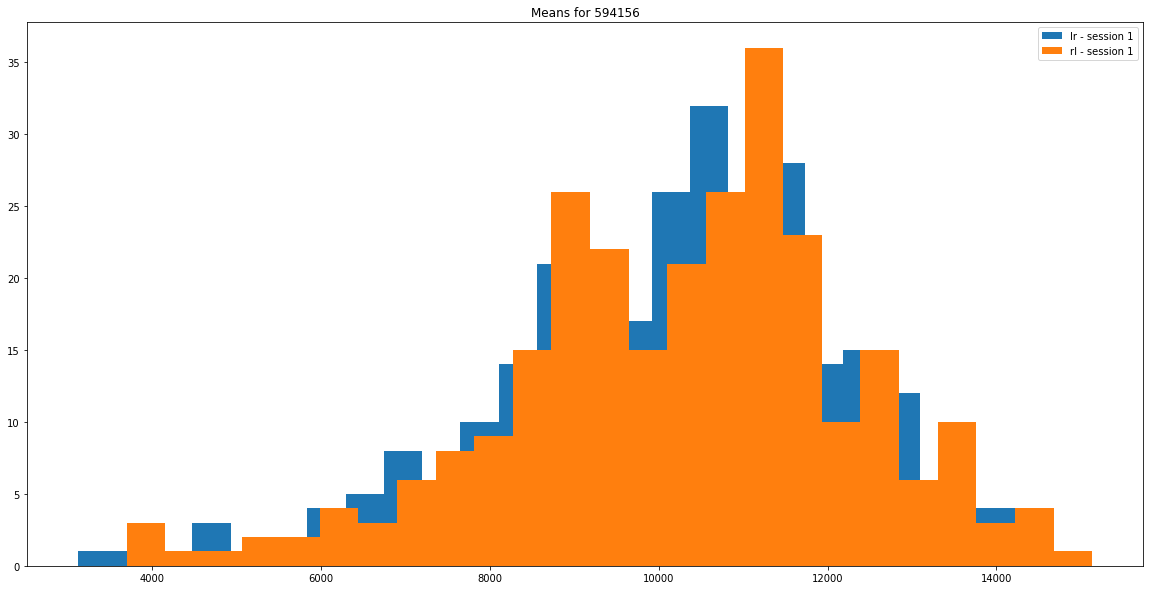

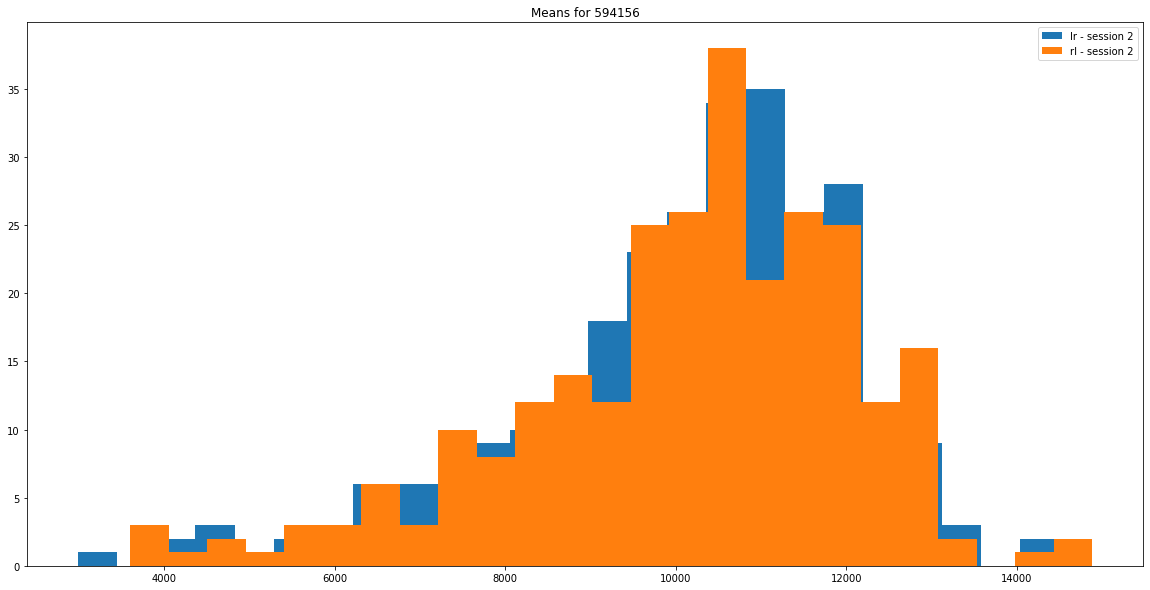

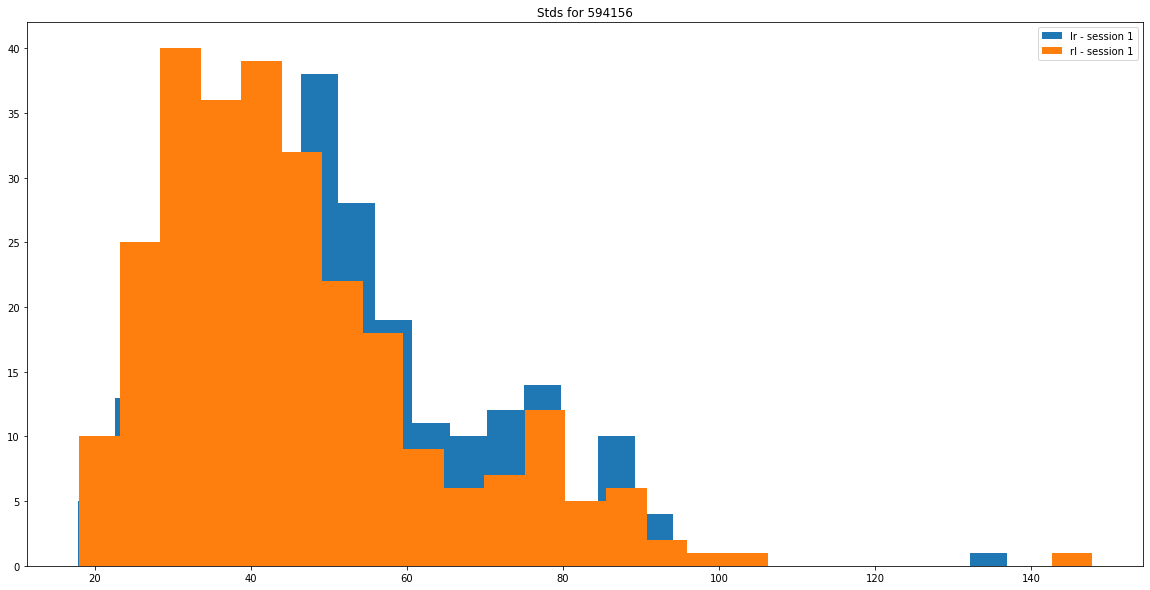

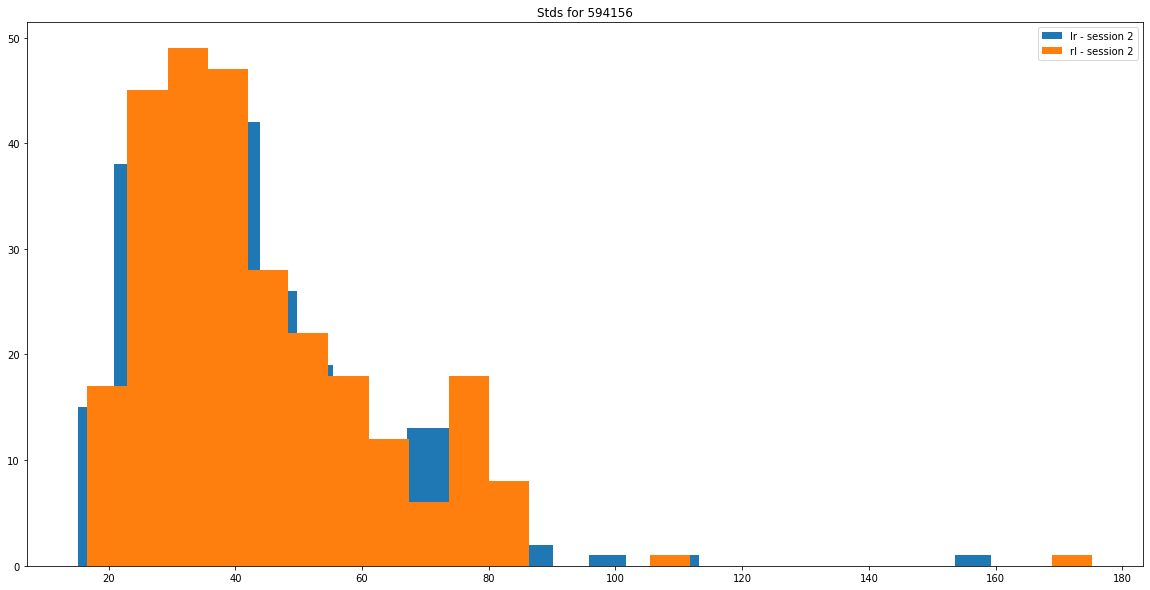

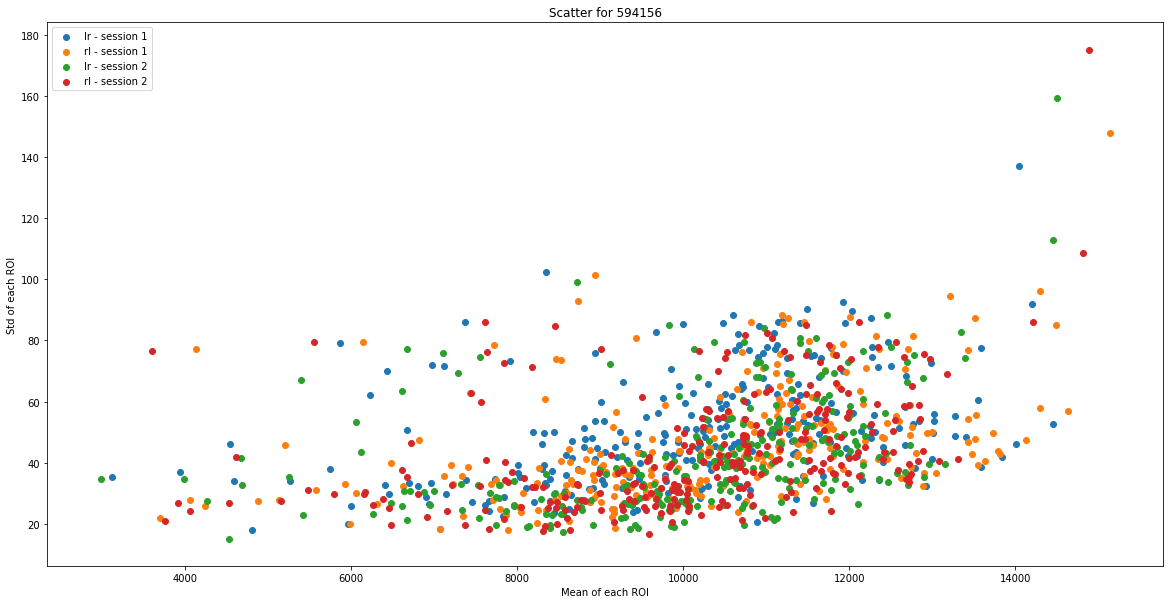

Position of maximum std: 264 264 264 264 
#############################################################################################################################################
#############################################################################################################################################
992774


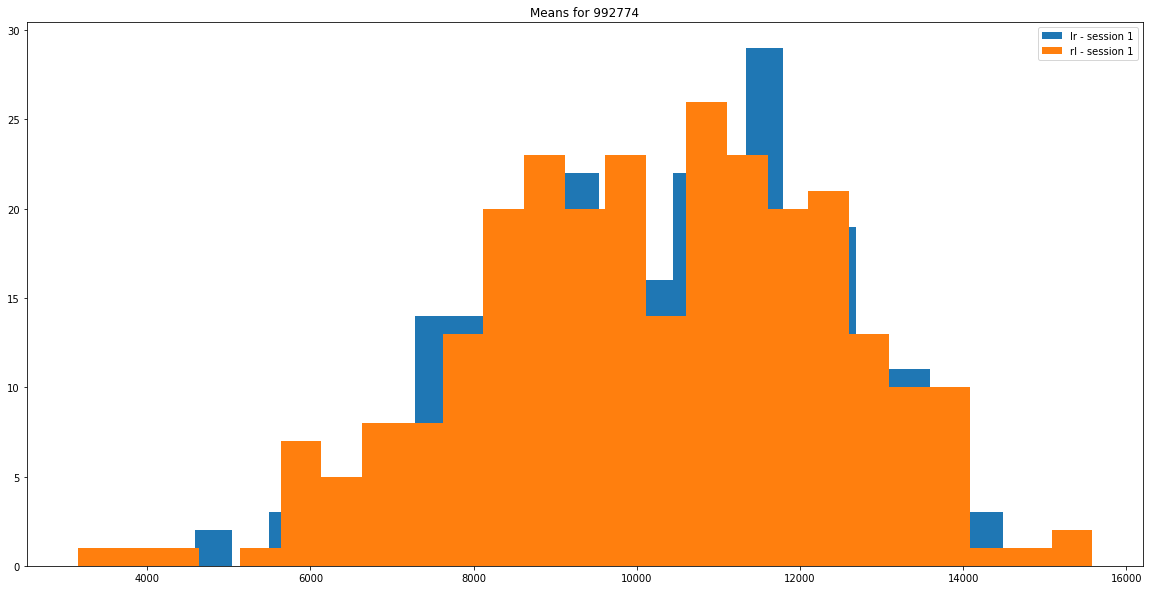

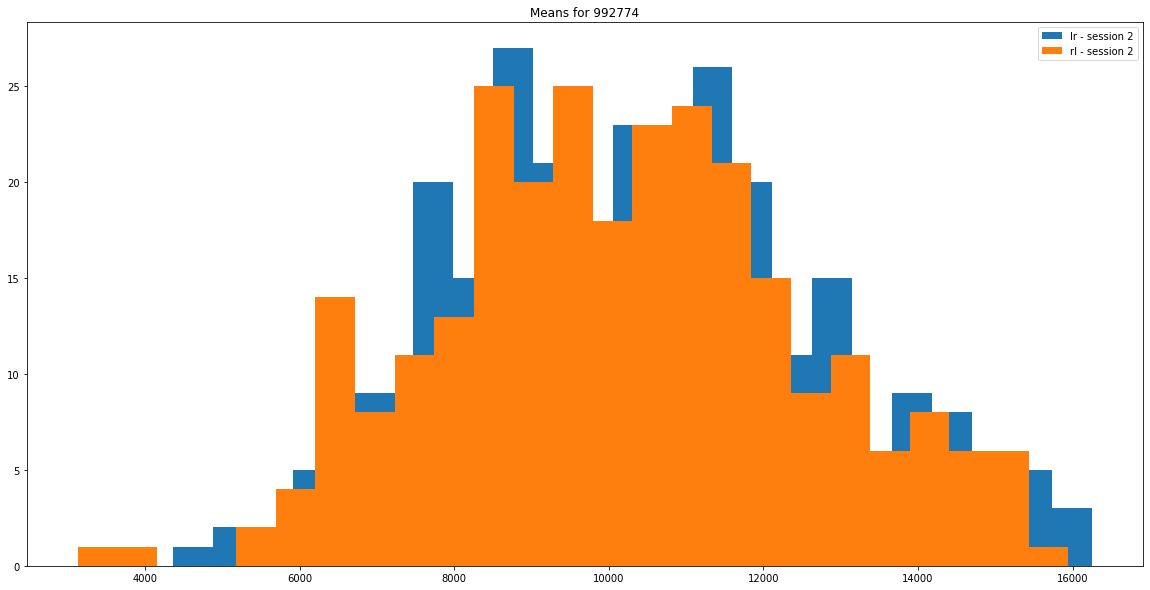

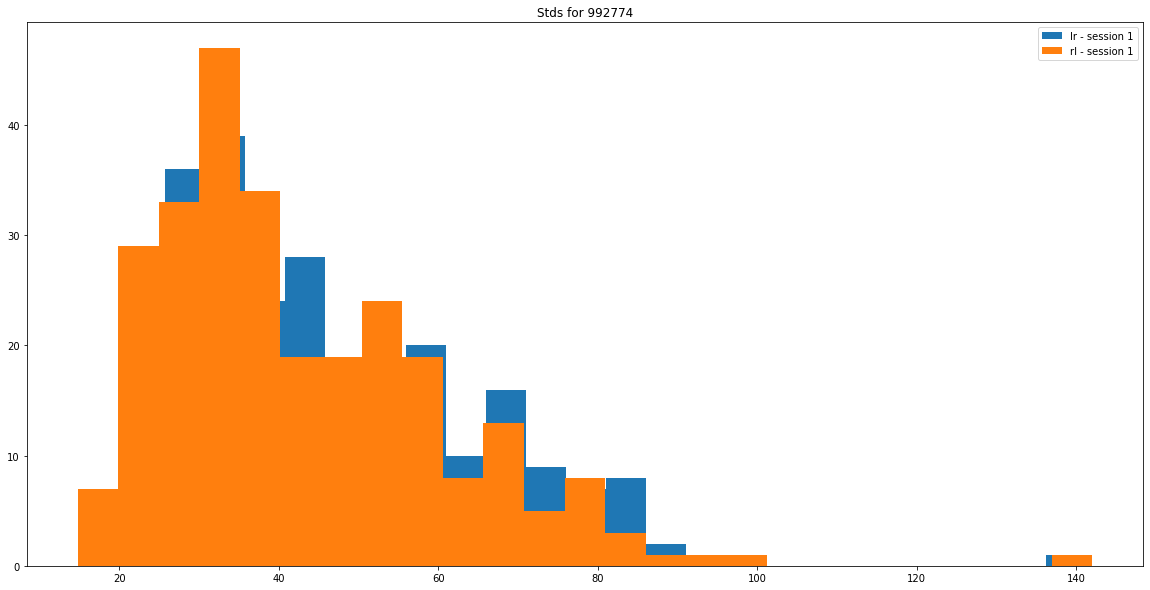

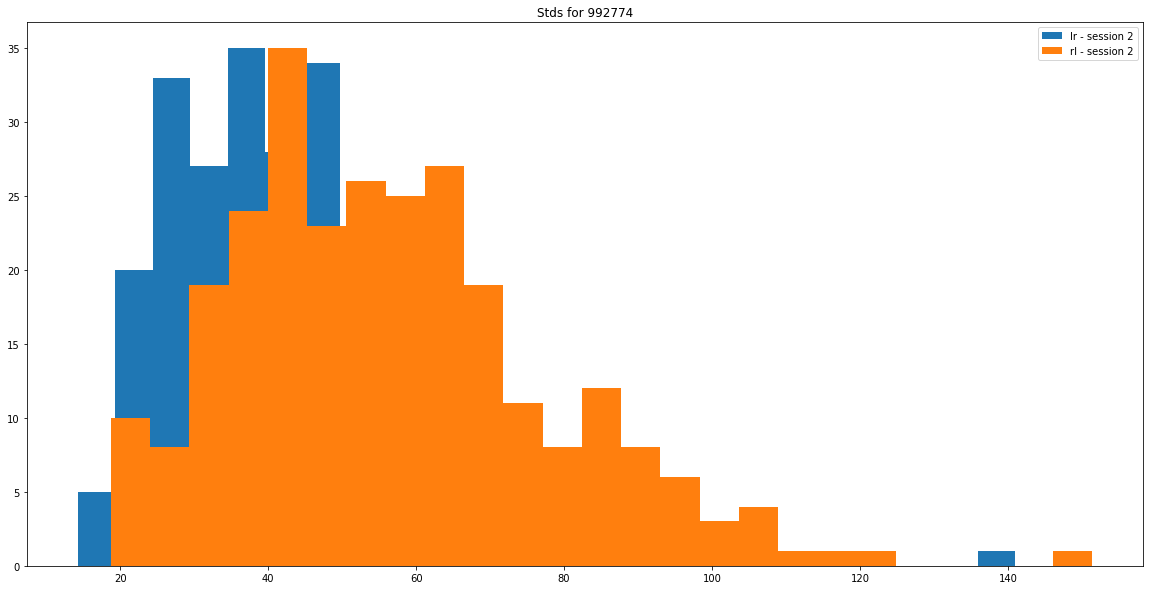

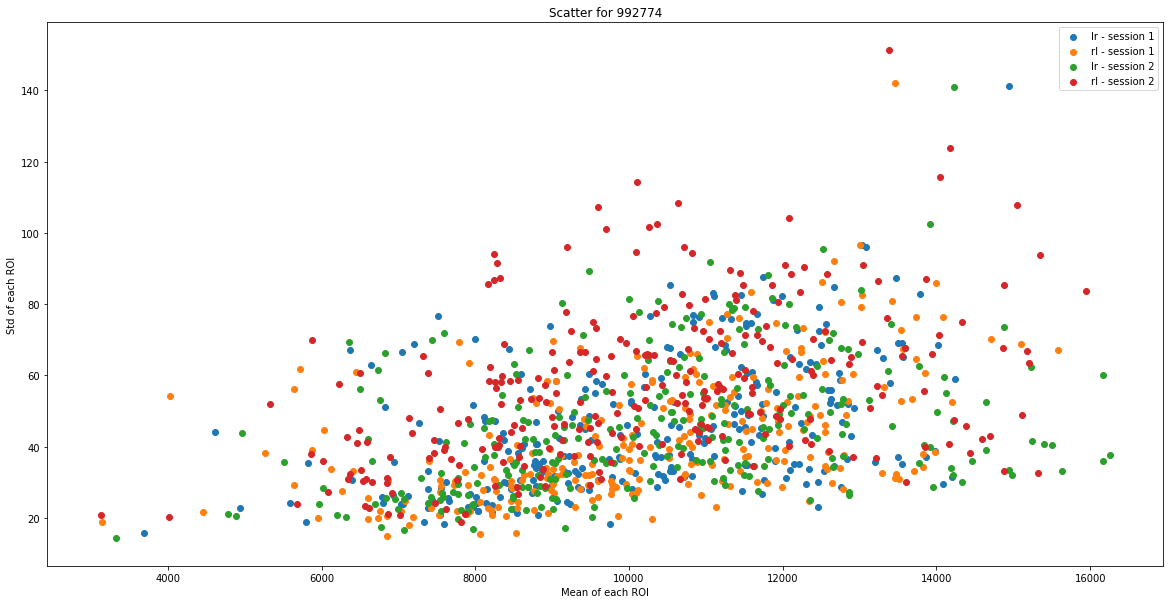

Position of maximum std: 264 264 264 264 


In [29]:
ids = [1, 370, 570, 770, 970]
for id, person in enumerate(filtered_people):
    
    if id not in ids:
        continue
    print("#############################################################################################################################################")
    print("#############################################################################################################################################")
    print(person)
        
    timeseries = np.load(get_timeseries_path(person, 1))
    ts1_lr = timeseries[:, :1200]
    ts1_rl = timeseries[:, 1200:]
    timeseries = np.load(get_timeseries_path(person, 2))
    ts2_lr = timeseries[:, :1200]
    ts2_rl = timeseries[:, 1200:]

    plt.figure(figsize=(20,10))
    _ = plt.hist(ts1_lr.mean(axis=1), bins=25, label='lr - session 1')
    _ = plt.hist(ts1_rl.mean(axis=1), bins=25, label='rl - session 1')
    plt.legend()
    plt.title("Means for " + str(person))
    plt.show()
    plt.close()
    plt.figure(figsize=(20,10))
    _ = plt.hist(ts2_lr.mean(axis=1), bins=25, label='lr - session 2')
    _ = plt.hist(ts2_rl.mean(axis=1), bins=25, label='rl - session 2')
    plt.legend()
    plt.title("Means for " + str(person))
    plt.show()
    plt.close()
    plt.figure(figsize=(20,10))
    _ = plt.hist(ts1_lr.std(axis=1), bins=25, label='lr - session 1')
    _ = plt.hist(ts1_rl.std(axis=1), bins=25, label='rl - session 1')
    plt.legend()
    plt.title("Stds for " + str(person))
    plt.show()
    plt.close()
    plt.figure(figsize=(20,10))
    _ = plt.hist(ts2_lr.std(axis=1), bins=25, label='lr - session 2')
    _ = plt.hist(ts2_rl.std(axis=1), bins=25, label='rl - session 2')
    plt.legend()
    plt.title("Stds for " + str(person))
    plt.show()
    plt.close()
    ##
    plt.figure(figsize=(20,10))
    _ = plt.scatter(x = ts1_lr.mean(axis=1), y=ts1_lr.std(axis=1), label='lr - session 1')
    _ = plt.scatter(x = ts1_rl.mean(axis=1), y=ts1_rl.std(axis=1), label='rl - session 1')
    _ = plt.scatter(x = ts2_lr.mean(axis=1), y=ts2_lr.std(axis=1), label='lr - session 2')
    _ = plt.scatter(x = ts2_rl.mean(axis=1), y=ts2_rl.std(axis=1), label='rl - session 2')
    plt.legend()
    plt.xlabel("Mean of each ROI")
    plt.ylabel("Std of each ROI")
    plt.title("Scatter for " + str(person))
    plt.show()
    plt.close()
    print("Position of maximum std: ", end='')
    for part in [ts1_lr, ts1_rl, ts2_lr, ts2_rl]:
        print(ts1_lr.std(axis=1).argmax(), end=' ')
    print()

In [27]:
print(max(ts1_lr.mean(axis=1)))
print(ts1_lr.mean(axis=1).argmax())
print(ts1_lr.mean(axis=1)[ts1_lr.mean(axis=1).argmax()])

14942.5950644
264
14942.5950644


In [31]:
def get_bn_path(person, session):
    return f'../hcp_multimodal_parcellation/timeseries/{person}_{session}/{person}_rfMRI_REST{session}_rfMRI_REST{session}_hp2000_clean_BN_Atlas_246_2mm.txt'


def get_aal_path(person, session):
    return f'../hcp_multimodal_parcellation/timeseries/{person}_{session}/{person}_rfMRI_REST{session}_rfMRI_REST{session}_hp2000_clean_AAL3.txt'

day_session = '1'

arr_bn_lr = np.genfromtxt(get_bn_path(person, day_session + '_LR'))
arr_aal_lr = np.genfromtxt(get_aal_path(person, day_session + '_LR'))
arr_concat_lr = np.concatenate([arr_bn_lr, arr_aal_lr[94:120]], axis=0)

arr_bn_rl = np.genfromtxt(get_bn_path(person, day_session + '_RL'))
arr_aal_rl = np.genfromtxt(get_aal_path(person, day_session + '_RL'))
arr_concat_rl = np.concatenate([arr_bn_rl, arr_aal_rl[94:120]], axis=0)

final_ts = np.concatenate([arr_concat_lr, arr_concat_rl], axis=1)

In [53]:
print(arr_bn_rl.shape)
print(arr_aal_rl[94:120].shape)
print(arr_concat_rl.shape)
print(arr_aal_rl[94:120][18, 1])
print(arr_concat_rl[264, 1])

(246, 1200)
(26, 1200)
(272, 1200)
13398.64314
13398.64314
